In [1]:
%matplotlib inline
from pylab import *
import plotly.express as px

In [59]:
import seaborn as sns
sns.set(font='sans-serif',
        rc={
 'axes.axisbelow': False,
 'axes.edgecolor': 'lightgrey',
 'axes.facecolor': 'None',
 'axes.grid': False,
 'axes.labelcolor': 'dimgrey',
 'axes.spines.right': False,
 'axes.spines.top': False,
 'figure.facecolor': 'white',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': 'dimgrey',
 'xtick.color': 'dimgrey',
 'xtick.direction': 'out',
 'xtick.bottom': True,
 'xtick.top': False,
 'ytick.color': 'dimgrey',
 'ytick.direction': 'out',
            'ytick.left': True,
 'ytick.right': False})
sns.set_context("notebook", rc={"font.size":16,
                                "axes.titlesize":20,
                                "axes.labelsize":18})

In [70]:
import csv, datetime
with open('btcchf.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    lines = [l for l in reader]
prices = {datetime.datetime.strptime(p[0], '%d.%m.%Y'): float(p[1].replace('’','')) for p in lines}
ds = sorted(prices.keys())
ps = [prices[p] for p in sorted(prices.keys())]

([<matplotlib.axis.YTick at 0x7f27e2ef8d60>,
 [Text(0, 0.0, '-100%'), Text(0, 0.5, '-50%'), Text(0, 1.0, '0%')])

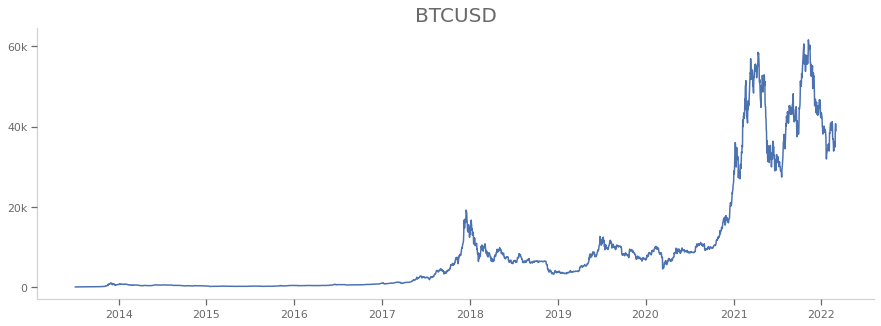

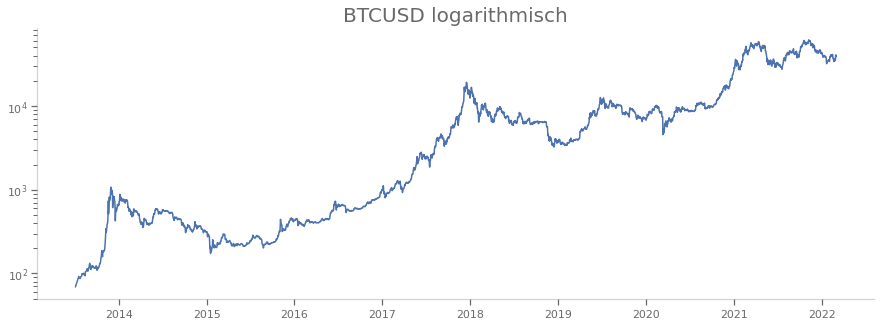

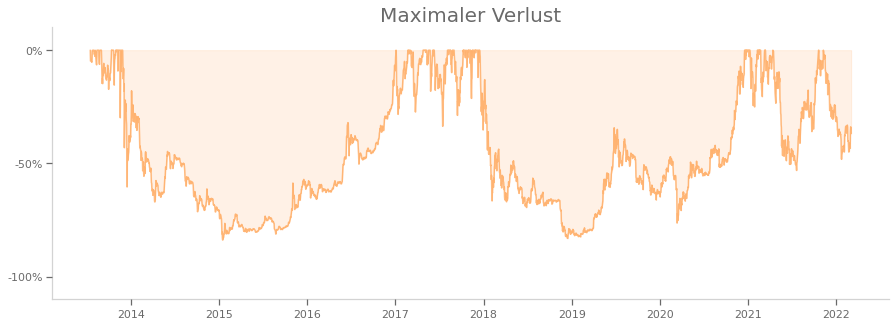

In [71]:
figure(figsize=(15,5))
plot(ds, ps)
yticks([0,20000,40000,60000], ["0", "20k", "40k", "60k"])
title("BTCUSD")
figure(figsize=(15,5))
semilogy(ds, ps)
title("BTCUSD logarithmisch")
figure(figsize=(15,5))
drawdowns = [ps[i]/max(ps[:i+1]) for i in range(1, len(ps))]
plt.plot(ds[1:], drawdowns,color='tab:orange', alpha=0.5)
fill_between(ds[1:], drawdowns, 1, color='tab:orange', alpha=0.1)
title("Maximaler Verlust")
ylim([-0.1,1.1])
yticks([0,0.5,1.0], ["-100%", "-50%", "0%"])

In [130]:
def get_returns(delta):
    returns = {}
    for d in prices.keys():
        if d - delta not in prices.keys():
            continue
        returns[d]= prices[d]/prices[d-delta]
    return returns

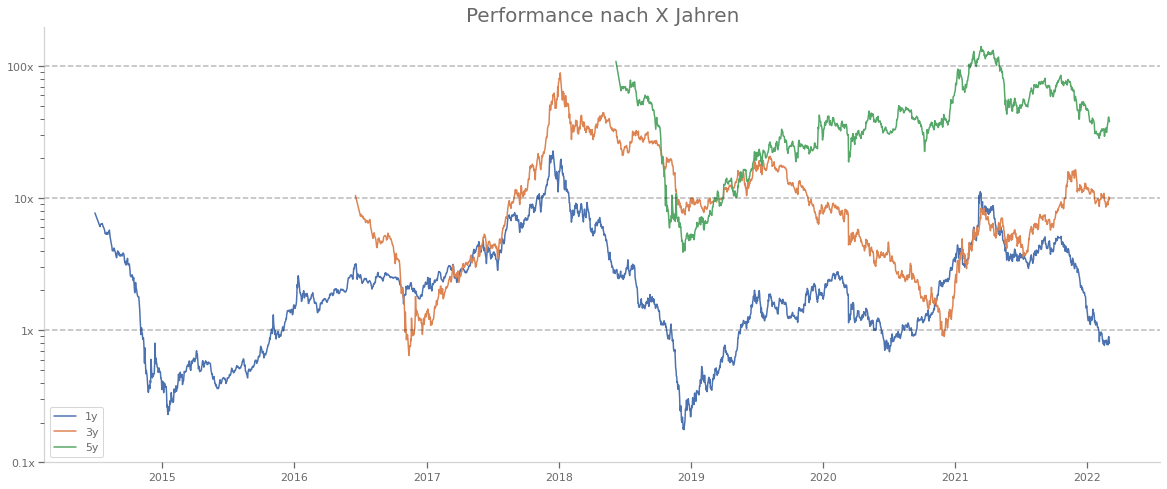

In [137]:
figure(figsize=(20,8))
for d in [360, 3*360, 5*360]:
    rets = get_returns(datetime.timedelta(days=d))
    semilogy(sorted(rets.keys()), [rets[k] for k in sorted(rets.keys())])
xl = xlim()
plot(xl, [1,1],'k--', alpha=0.3)
plot(xl, [10,10],'k--', alpha=0.3)
plot(xl, [100,100],'k--', alpha=0.3)
xlim(xl)
legend(["1y", "3y", "5y"])
yticks([0.1, 1,10,100],["0.1x", "1x", "10x","100x"])
_=title("Performance nach X Jahren")